<a href="https://colab.research.google.com/github/st064560/my_python/blob/master/%D0%BF%D0%BE%D0%BB%D0%B5%D0%B7%D0%BD%D1%8B%D0%B9_%D0%BA%D0%BE%D0%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# импортируем библиотеки numpy и pandas
import numpy as np
import pandas as pd

# импортируем библиотеку datetime для работы с датами
import datetime
from datetime import datetime, date

# импортируем библиотеку matplotlib для построения графиков
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
url = 'https://raw.githubusercontent.com/dm-fedorov/pandas_basic/master/%D0%BF%D0%BE%D0%B4%D1%80%D0%BE%D0%B1%D0%BD%D0%B5%D0%B5%20%D0%B8%D0%B7%D1%83%D1%87%D0%B0%D0%B5%D0%BC%20pandas/Data/orders.csv'

In [ ]:
import pandas as pd
df = pd.read_csv(url)
df

,id,order_date,ship_mode,customer_id,sales
0,100006,2014-09-07,Standard,DK-13375,377.970
1,100090,2014-07-08,Standard,EB-13705,699.192
2,100293,2014-03-14,Standard,NF-18475,91.056
3,100328,2014-01-28,Standard,JC-15340,3.928
4,100363,2014-04-08,Standard,JM-15655,21.376
...,...,...,...,...,...
5004,168802,2017-11-03,Standard,JO-15145,18.368
5005,169320,2017-07-23,Second,LH-16900,171.430
5006,169488,2017-09-07,First,AA-10375,56.860
5007,169502,2017-08-28,Standard,MG-17650,113.410


Переводим столбец в формат даты

In [ ]:
df = pd.read_csv(url, parse_dates=['order_date'])
df

,id,order_date,ship_mode,customer_id,sales
0,100006,2014-09-07,Standard,DK-13375,377.970
1,100090,2014-07-08,Standard,EB-13705,699.192
2,100293,2014-03-14,Standard,NF-18475,91.056
3,100328,2014-01-28,Standard,JC-15340,3.928
4,100363,2014-04-08,Standard,JM-15655,21.376
...,...,...,...,...,...
5004,168802,2017-11-03,Standard,JO-15145,18.368
5005,169320,2017-07-23,Second,LH-16900,171.430
5006,169488,2017-09-07,First,AA-10375,56.860
5007,169502,2017-08-28,Standard,MG-17650,113.410


Проверим поменялся ли формат

In [ ]:
type(df.order_date[0])

pandas._libs.tslibs.timestamps.Timestamp

Сделаем дату - индексом

In [ ]:
df = pd.read_csv(url, parse_dates=['order_date'], index_col='order_date')
df

,id,ship_mode,customer_id,sales
order_date,,,,
2014-09-07,100006,Standard,DK-13375,377.970
2014-07-08,100090,Standard,EB-13705,699.192
2014-03-14,100293,Standard,NF-18475,91.056
2014-01-28,100328,Standard,JC-15340,3.928
2014-04-08,100363,Standard,JM-15655,21.376
...,...,...,...,...
2017-11-03,168802,Standard,JO-15145,18.368
2017-07-23,169320,Second,LH-16900,171.430
2017-09-07,169488,First,AA-10375,56.860


In [ ]:
s = df['sales'].value_counts(bins=10)
s

(-23.106, 2366.623]       4851
(2366.623, 4732.69]        125
(4732.69, 7098.758]         18
(7098.758, 9464.825]         7
(9464.825, 11830.892]        4
(11830.892, 14196.959]       2
(21295.161, 23661.228]       1
(16563.026, 18929.094]       1
(18929.094, 21295.161]       0
(14196.959, 16563.026]       0
Name: sales, dtype: int64

In [ ]:
s.index[3]

Interval(7098.758, 9464.825, closed='right')

In [ ]:
s.index[3].left

7098.758

In [ ]:
df.loc[(df['sales'] > s.index[3].left)]

,id,order_date,ship_mode,customer_id,sales
215,116904,2014-09-23,Standard,SC-20095,9900.190
483,139892,2014-09-08,Standard,BM-11140,10539.896
534,143917,2014-07-25,Second,KL-16645,8319.290
545,145317,2014-03-18,Standard,SM-20320,23661.228
1967,117121,2016-12-17,Standard,AB-10105,9892.740
1992,118689,2016-10-02,Standard,TC-20980,18336.740
2366,143714,2016-05-23,Standard,CC-12370,8539.020
2614,158841,2016-02-02,Second,SE-20110,8805.040
2797,100111,2017-09-20,Standard,SV-20365,7359.918
3349,127180,2017-10-22,First,TA-21385,13716.458


In [ ]:
m = df['ship_mode'].value_counts()
m.index

Index(['Standard', 'Second', 'First', 'Same Day'], dtype='object')

In [ ]:
len(m.index)

4

In [ ]:
df['ship_mode'].unique()

array(['Standard', 'Second', 'First', 'Same Day'], dtype=object)

In [ ]:
df['ship_mode'].nunique()

4

Иногда бывает полезно преобразовать серию, получившуюся в результате работы функции value_counts, в датафрейм. Для этого нужно к получившейся серии применить функцию reset_index. Эта операция может пригодиться вам в ходе дальнейшего решения задач.

In [ ]:
m = df['ship_mode'].value_counts()
m_df = m.reset_index()
m_df

,index,ship_mode
0,Standard,2994
1,Second,964
2,First,787
3,Same Day,264


In [ ]:
m_df.columns = ['Ship_mode','Count']
m_df

,Ship_mode,Count
0,Standard,2994
1,Second,964
2,First,787
3,Same Day,264


In [ ]:
# параметр ascending=False указывает, что данные надо сортировать по убыванию
grouped_df = df.groupby(['ship_mode'])['sales'].sum().sort_values(ascending=False)
grouped_df.head(5)

ship_mode
Standard    1.358216e+06
Second      4.591936e+05
First       3.514284e+05
Same Day    1.283631e+05
Name: sales, dtype: float64

Построим график

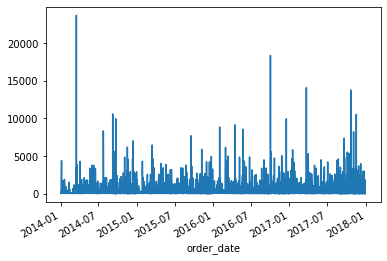

In [ ]:
df.sales.plot()

In [ ]:
df.shape

(5009, 4)

In [ ]:
df.info

<bound method DataFrame.info of                 id ship_mode customer_id     sales
order_date                                        
2014-09-07  100006  Standard    DK-13375   377.970
2014-07-08  100090  Standard    EB-13705   699.192
2014-03-14  100293  Standard    NF-18475    91.056
2014-01-28  100328  Standard    JC-15340     3.928
2014-04-08  100363  Standard    JM-15655    21.376
...            ...       ...         ...       ...
2017-11-03  168802  Standard    JO-15145    18.368
2017-07-23  169320    Second    LH-16900   171.430
2017-09-07  169488     First    AA-10375    56.860
2017-08-28  169502  Standard    MG-17650   113.410
2017-07-07  169551     First    RL-19615  1344.838

[5009 rows x 4 columns]>

In [ ]:
len(df)

5009

In [ ]:
df.size

20036

In [ ]:
df[['id', 'sales']].head()

,id,sales
order_date,,
2014-09-07,100006,377.970
2014-07-08,100090,699.192
2014-03-14,100293,91.056
2014-01-28,100328,3.928
2014-04-08,100363,21.376


In [ ]:
df[df.sales > 250]

,id,ship_mode,customer_id,sales
order_date,,,,
2014-09-07,100006,Standard,DK-13375,377.970
2014-07-08,100090,Standard,EB-13705,699.192
2014-04-18,100678,Standard,KM-16720,697.074
2014-11-24,100762,Standard,NG-18355,508.620
2014-10-19,100867,Standard,EH-14125,321.552
...,...,...,...,...
2017-07-26,167318,Standard,GZ-14545,2012.302
2017-01-13,167402,Second,CP-12085,4619.330
2017-12-09,167920,Second,JL-15835,1827.510


In [ ]:
df[(df.ship_mode == 'Second')]

,id,ship_mode,customer_id,sales
order_date,,,,
2014-12-16,100706,Second,LE-16810,129.44
2014-03-26,100860,Second,CS-12505,18.75
2014-11-19,100972,Second,DB-13360,166.44
2014-08-27,101266,Second,MM-17920,13.36
2014-11-28,101560,Second,CS-12250,542.34
...,...,...,...,...
2017-04-29,164056,Second,FM-14215,1048.35
2017-09-04,166394,Second,VM-21835,14.82
2017-01-13,167402,Second,CP-12085,4619.33


In [ ]:
df[(df.ship_mode == 'Second') & (df.sales > 250)]

,id,ship_mode,customer_id,sales
order_date,,,,
2014-11-28,101560,Second,CS-12250,542.340
2014-04-05,102988,Second,GM-14695,4251.920
2014-03-01,104269,Second,DB-13060,457.568
2014-12-30,104738,Second,SP-20620,609.614
2014-06-07,106229,Second,NR-18550,268.935
...,...,...,...,...
2017-12-23,162670,Second,MF-18250,1152.870
2017-11-02,163790,Second,NL-18310,1158.882
2017-04-29,164056,Second,FM-14215,1048.350


Изменить формат

In [ ]:
df.sales = df.sales.astype(int)
df.sales
df

,id,ship_mode,customer_id,sales
order_date,,,,
2014-09-07,100006,Standard,DK-13375,377
2014-07-08,100090,Standard,EB-13705,699
2014-03-14,100293,Standard,NF-18475,91
2014-01-28,100328,Standard,JC-15340,3
2014-04-08,100363,Standard,JM-15655,21
...,...,...,...,...
2017-11-03,168802,Standard,JO-15145,18
2017-07-23,169320,Second,LH-16900,171
2017-09-07,169488,First,AA-10375,56


Переименовать столбец

In [ ]:
df.sales.describe

<bound method NDFrame.describe of order_date
2014-09-07     377
2014-07-08     699
2014-03-14      91
2014-01-28       3
2014-04-08      21
              ... 
2017-11-03      18
2017-07-23     171
2017-09-07      56
2017-08-28     113
2017-07-07    1344
Name: sales, Length: 5009, dtype: int64>

In [ ]:
df_rename = df.rename(columns={'id': 'id_point'})
df_rename

,id_point,ship_mode,customer_id,sales
order_date,,,,
2014-09-07,100006,Standard,DK-13375,377
2014-07-08,100090,Standard,EB-13705,699
2014-03-14,100293,Standard,NF-18475,91
2014-01-28,100328,Standard,JC-15340,3
2014-04-08,100363,Standard,JM-15655,21
...,...,...,...,...
2017-11-03,168802,Standard,JO-15145,18
2017-07-23,169320,Second,LH-16900,171
2017-09-07,169488,First,AA-10375,56


**РИСУЕМ** **ГРАФИКИ**

In [ ]:
# импортируем библиотеки numpy и pandas
import numpy as np
import pandas as pd

# импортируем библиотеку datetime для работы с датами
import datetime
from datetime import datetime, date

# импортируем библиотеку matplotlib для построения графиков
import matplotlib.pyplot as plt

In [ ]:
# генерируем временной ряд на
# основе случайного блуждания
s = pd.Series(np.random.randn(1096),
              index=pd.date_range('2012-01-01', 
                                  '2014-12-31'))
s

2012-01-01    1.009978
2012-01-02   -0.391720
2012-01-03    1.880083
2012-01-04   -0.319385
2012-01-05   -1.179741
                ...   
2014-12-27    1.636881
2014-12-28   -0.523037
2014-12-29    0.033234
2014-12-30   -2.377418
2014-12-31    0.164124
Freq: D, Length: 1096, dtype: float64

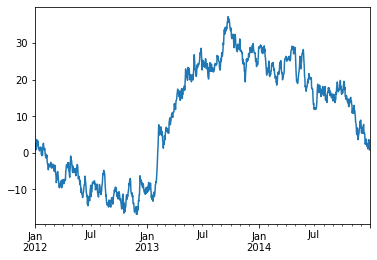

In [ ]:
walk_ts = s.cumsum()
# эта строка визуализирует случайное блуждание - так просто :)
walk_ts.plot();

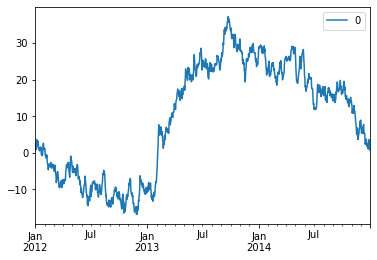

In [ ]:
walk_df = pd.DataFrame(walk_ts)
walk_df.plot();

In [ ]:
# сгенерируем два случайных блуждания, которые станут двумя столбцами объекта DataFrame:
df = pd.DataFrame(np.random.randn(1096, 2), 
                  index=walk_ts.index, columns=list('AB'))
walk_df = df.cumsum()
walk_df.head()

,A,B
2012-01-01,0.871462,0.536774
2012-01-02,-0.390103,0.320417
2012-01-03,-0.522760,1.391338
2012-01-04,-0.105158,1.367353
2012-01-05,-1.379537,1.566086


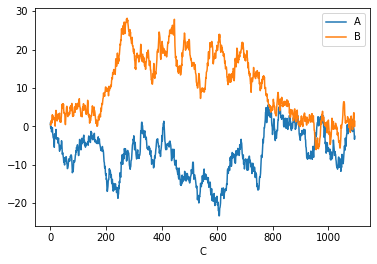

In [ ]:
# создаем копию случайного блуждания
df2 = walk_df.copy()
# добавляем столбец C, который принимает значения от 0 до 1096
df2['C'] = pd.Series(np.arange(0, len(df2)), index=df2.index)
# в качестве меток оси X вместо дат используем значения столбца 'C', получаем метки оси x в диапазоне от 0 до 1000
df2.plot(x='C', y=['A', 'B']);

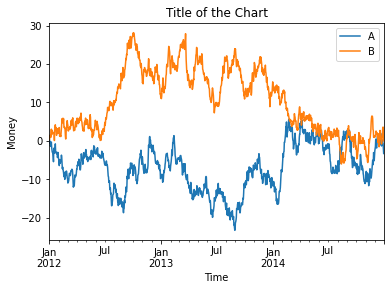

In [ ]:
# создаем график временного ряда с заголовком и заданными  подписями осей x и y

# заголовок задаем с помощью параметра title метода .plot()
walk_df.plot(title='Title of the Chart')
# после вызова метода .plot() явно
# задаем подписи осей x и y
plt.xlabel('Time')
plt.ylabel('Money');

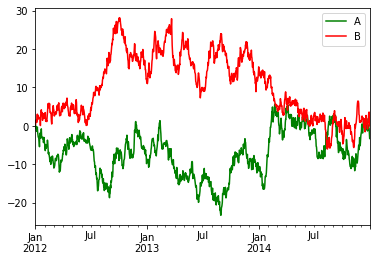

In [ ]:
# меняем цвета линий графика, используя символьный
# код для первой линии и шестнадцатеричный
# RGB-код для второй
walk_df.plot(style=['g', '#FF0000']);

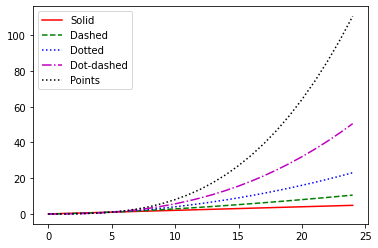

In [ ]:
# демонстрируем различные стили линий
t = np.arange(0., 5., 0.2)
legend_labels = ['Solid', 'Dashed', 'Dotted', 
                 'Dot-dashed', 'Points']
line_style = pd.DataFrame({0 : t,
                           1 : t**1.5,
                           2 : t**2.0,
                           3 : t**2.5,
                           4 : t**3.0})
# создаем график, задав цвет и стиль каждой линии
ax = line_style.plot(style=['r-', 'g--', 'b:', 'm-.', 'k:'])
# задаем легенду
ax.legend(legend_labels, loc='upper left');